In [1]:
import pandas as pd
# Load dataset
df = pd.read_csv("/Users/shallypreethikamani/Downloads/MData.csv")

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [5]:
#Finding the missing values
print(df.isnull().sum())
# We can see that there are no missing values

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [7]:
# Converting the categorial variables to numerical
df["Type"] = df["Type"].replace({'L': 0, 'M': 1, 'H': 2})
#print(df["Type"].head())

/var/folders/dl/w6v9h4y90yvcspw03vjc_j8w0000gn/T/ipykernel_25185/1697054366.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Type"] = df["Type"].replace({'L': 0, 'M': 1, 'H': 2})


In [9]:
# Dropping the 'product ID' column since it's redundant
df.drop(columns=["Product ID", "UDI"], inplace=True)
#df.head()

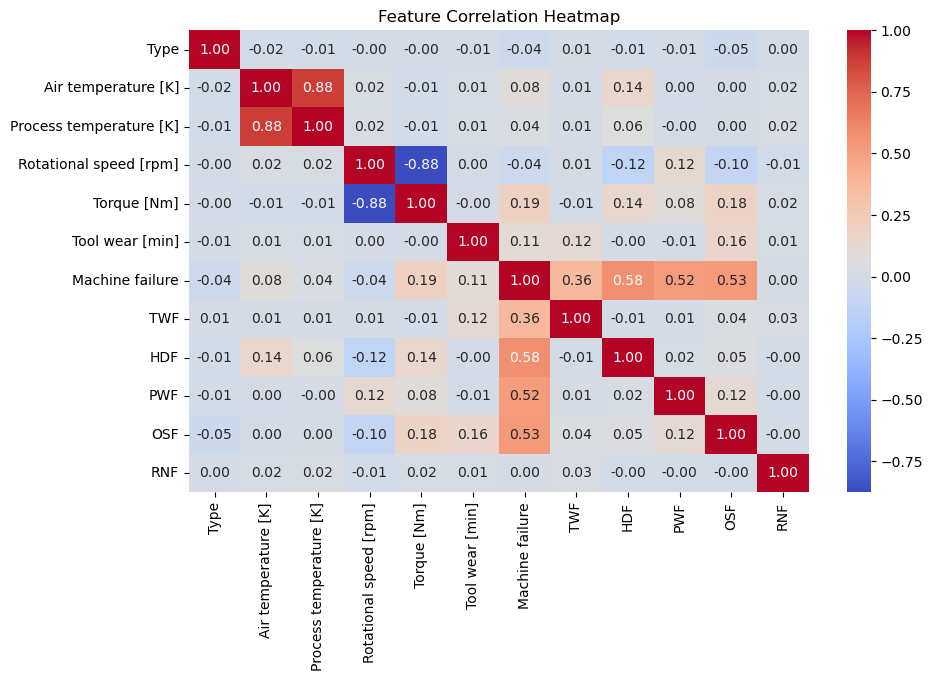

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting correlation map
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [13]:
# Standardize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [15]:
# Feature Engineering
df["Temp_Difference"] = df["Process temperature [K]"] - df["Air temperature [K]"]
df["Power"] = df["Torque [Nm]"] * df["Rotational speed [rpm]"] * (2 * 3.1416 / 60)
df["Overstrain"] = df["Torque [Nm]"] * df["Tool wear [min]"]
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Temp_Difference,Power,Overstrain
0,1,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0,0,0,0,0,0,0.005030,0.002015,-0.478606
1,0,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0,0,0,0,0,0,0.022434,-0.048379,-1.044231
2,0,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0,0,0,0,0,0,-0.062371,-0.022492,-1.527323
3,0,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0,0,0,0,0,0,-0.044966,0.003018,0.077469
4,0,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0,0,0,0,0,0,0.022434,-0.000100,-0.002041


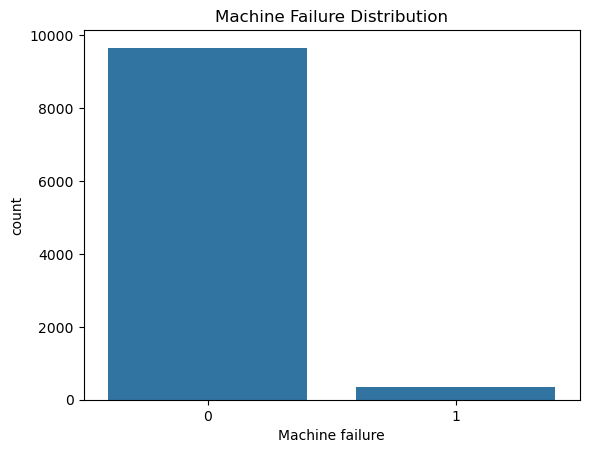

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot failure distribution
ax = sns.countplot(x=df["Machine failure"])
plt.title("Machine Failure Distribution")
# Show the plot
plt.show()

# We can see that the data is imbalanced.

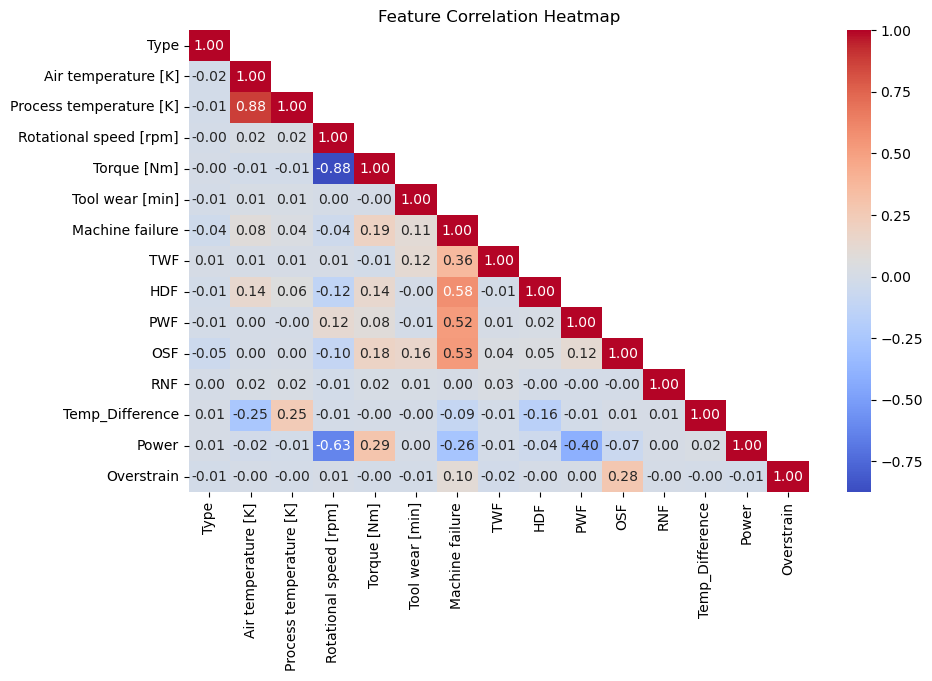

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting correlation map
plt.figure(figsize=(10, 6))

# Mask the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool), k=1)

# Create the heatmap with the mask applied
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", mask=mask)

plt.title("Feature Correlation Heatmap")
plt.show()

In [21]:
# Dropping the 'product ID' column since it's redundant
df.drop(columns=["Type"], inplace=True)
#Because we can see that there are no correlations in it.

In [23]:
from sklearn.model_selection import train_test_split
# Define features (X) and target (y)
X = df.drop(columns=['Machine failure'])  # Drop the target variable
y = df['Machine failure']  # Target variable

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the model
#Since it was imbalanced, we have balanced it by adding class_weight.
rf_model = RandomForestClassifier(class_weight='balanced',n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9985
Confusion Matrix:
 [[1939    0]
 [   3   58]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.95      0.97        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



In [37]:
# Train the model
rf_model.fit(X_train, y_train)

# Evaluate on training set
train_accuracy = rf_model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy}")

# Evaluate on testing set
test_accuracy = rf_model.score(X_test, y_test)
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 1.0
Testing Accuracy: 0.9985


In [39]:
# Checking if there is overfitting since training set is greater than testing
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")
# We can see that it score is really high showing that it is not overfitting

Cross-Validation Scores: [0.999  0.999  1.     0.9975 0.998 ]
Mean Cross-Validation Score: 0.9987


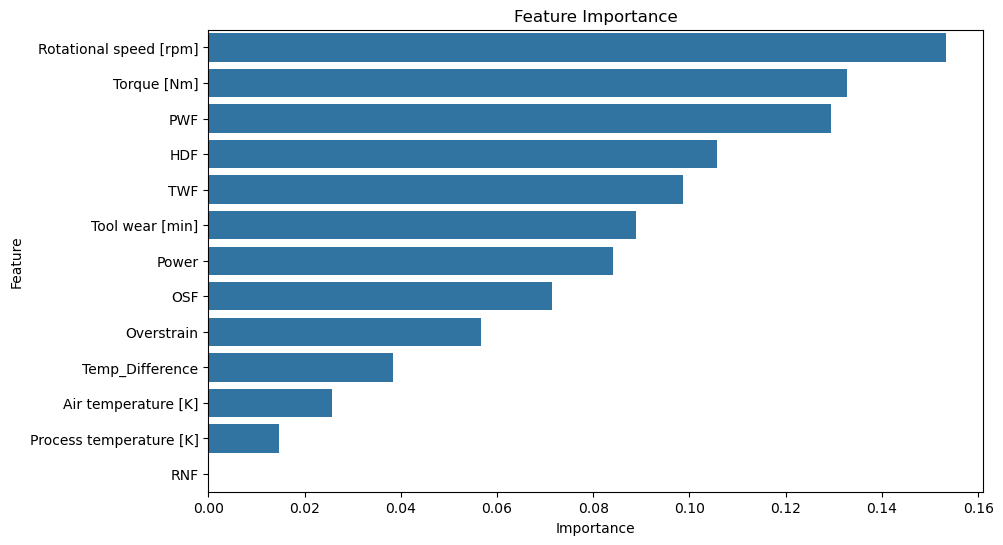

In [41]:
# Get feature importance from Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame for easy visualization
import pandas as pd
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000

